In [6]:
import pandas as pd
import numpy as np

In [7]:
name_basics = pd.read_csv('../data/imdb/name_basics.tsv', sep='\t')
print(name_basics.shape)
name_basics.head()

(11068232, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0060827,tt0050986,tt0083922"


In [8]:
title_akas = pd.read_csv('../data/imdb/title_akas.tsv', sep='\t')
print(title_akas.shape)
title_akas.head()

C:\Users\casiopa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(27190525, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [9]:
# El error que da de tipos mixtos, es por la columna runtimeMinutes

title_basics = pd.read_csv('../data/imdb/title_basics.tsv', sep='\t', na_values=["\\N"])
                           
print(title_basics.shape)
title_basics.head()

C:\Users\casiopa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(8084314, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short"


In [10]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8084314 entries, 0 to 8084313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 555.1+ MB


### Películas de 2019 que no tienen url: pelis fantasma de la base de datos

In [11]:
title_akas[title_akas.titleId=='tt5220804']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
20090481,tt5220804,1,Stray Kids,US,\N,\N,\N,0


In [12]:
title_basics[title_basics.tconst=='tt5220804']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5911977,tt5220804,movie,Stray Kids,Stray Kids,0.0,2019.0,NaN,NaN,"Crime,Drama"


In [13]:
title_akas[title_akas.titleId=='tt9118844']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
25705168,tt9118844,1,$MOKE,US,\N,\N,\N,0


In [14]:
title_basics[title_basics.tconst=='tt9118844']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7705436,tt9118844,movie,$MOKE,$MOKE,0.0,2019.0,NaN,NaN,NaN


### Películas por año en la base de datos de IMDb

In [15]:
annos = np.arange(2010,2022)
n_pelis = []
for anno in annos:
    pelis = len(title_basics[(title_basics.titleType=='movie') & (title_basics.startYear==anno)])
    n_pelis.append(pelis)
    print('Películas', anno, pelis)

Películas 2010 12218
Películas 2011 13148
Películas 2012 14105
Películas 2013 14791
Películas 2014 15862
Películas 2015 16412
Películas 2016 17609
Películas 2017 17967
Películas 2018 17819
Películas 2019 17181
Películas 2020 14632
Películas 2021 11842


In [16]:
annos

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [17]:
n_pelis

[12218,
 13148,
 14105,
 14791,
 15862,
 16412,
 17609,
 17967,
 17819,
 17181,
 14632,
 11842]

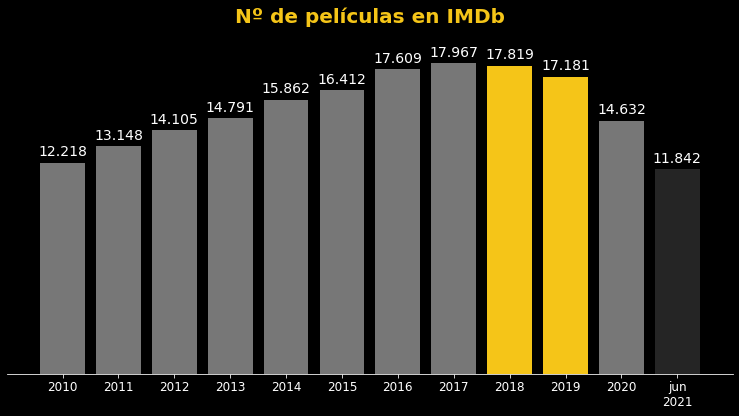

In [23]:
# libraries
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(13,6))

ax.bar(annos, n_pelis, color = ['#777', '#777', '#777', '#777', '#777', '#777', '#777', '#777', '#f5c518', '#f5c518', '#777', '#252525'])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Nº de películas en IMDb', fontdict={'fontname': 'Roboto', 'fontsize': 20, 'fontweight': 'bold', 'color': '#f5c518'}, pad=25)

annos_xticks = annos.astype(str)
annos_xticks[11] = 'jun\n2021'
plt.xticks(annos, labels=annos_xticks, fontsize=12)

# Pintar valores sobre las barras
for anno, peli in tuple(zip(annos, n_pelis)):
    ax.text(anno, peli+200, '{0:,}'.format(peli).replace(',', '.'), va='bottom', ha = 'center', fontsize = 14, fontweight = 'regular');
    
plt.savefig('IMDb_pelis_anno.png', dpi=300, bbox_inches='tight', transparent=True)

In [19]:
title_crew = pd.read_csv('../data/imdb/title_crew.tsv', sep='\t')
print(title_crew.shape)
title_crew.head()

(8081413, 3)


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [20]:
title_episode = pd.read_csv('../data/imdb/title_episode.tsv', sep='\t')
print(title_episode.shape)
title_episode.head()

(5911651, 4)


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [21]:
title_principals = pd.read_csv('../data/imdb/title_principals.tsv', sep='\t')
print(title_principals.shape)
title_principals.head()

(45747619, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [22]:
title_ratings = pd.read_csv('../data/imdb/title_ratings.tsv', sep='\t')
print(title_ratings.shape)
title_ratings.head()

(1171920, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,1722
1,tt0000002,6.0,211
2,tt0000003,6.5,1484
3,tt0000004,6.1,124
4,tt0000005,6.2,2286
